# 2021 Parteilose

In [3]:
import pandas as pd
import numpy as np
import cleandata as cd
import matplotlib

In [4]:
df_raw = pd.read_csv('../data/Gemeinde_Exekutive - daten.csv')
df_bev_raw = pd.read_csv('../data/KANTON_ZUERICH_bevoelkerung_1jahresklassen.csv', sep=';')

## Clean Data

In [5]:
df_raw = cd.clean(df_raw)

Jahrgänge nicht zugeordnet: 15
Partei nicht zugeordnet: 9
Keine Jahrgänge: 21


# Parteilose pro Einwohner berechnen

In [23]:
# Clean Bevölkerung
df_bev = df_bev_raw[df_bev_raw.JAHR == 2020].copy()

df_bev = df_bev.groupby('GEMEINDE').agg({'ANZAHL_PERSONEN': 'sum'}).reset_index()

df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.A.', 'am Albis', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.I.', 'am Irchel', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.d.Th.', 'an der Thur', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.S.', 'am See', regex=False)
df_bev['GEMEINDE'] = df_bev['GEMEINDE'].str.replace('a.d.L.', 'an der Limmat', regex=False)

In [24]:
df = df_raw.copy()

df = pd.pivot_table(df, index='Gemeinde', columns='partei_c', values='Name', aggfunc='count').reset_index()
df = df.fillna(0)
df['total'] = df.sum(axis=1)
df['parteilos%'] = (100 / df['total'] * df['parteilos'])

# Remove (ZH)
df['Gemeinde'] = df['Gemeinde'].str.replace(' (ZH)', '', regex=False)

# Join that shit!
df = df.merge(df_bev, how='left', left_on='Gemeinde', right_on='GEMEINDE')

<AxesSubplot:xlabel='parteilos%', ylabel='ANZAHL_PERSONEN'>

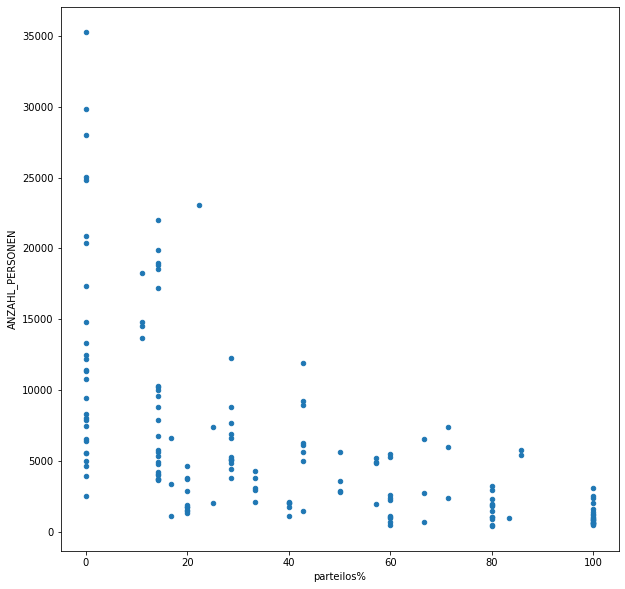

In [25]:
df[df.ANZAHL_PERSONEN < 100000].plot.scatter(x='parteilos%', y='ANZAHL_PERSONEN', figsize=(10, 10))